# 지도 학습 모형  
|모형|서브패키지|클래스(분류)|클래스(회귀)
|------|---|---|---|
|회귀|linear_model|LogisticRegression|LinearRegression|
|서포트벡터머신|SVM|SVC,LinearSVC|SVR,LinearSVR|
|나이브베이즈|navie_bayes|BernouliNB,MultinomialNB|GaussianNB|
|K-최근접이웃|neighbors|KNeighborsClassifier|KNeighborsRegressor|
|인공신경망|neural_network|MLPClassifier|MLPRegressor|
|의사결정나무|tree|DecisionTreeClassifier|DecisionTreeRegressor|
|배깅|ensemble|BaggingClassfier|BaggingRegressor|
|랜덤포레스트|ensemble|RandomForestClassifier|RandomForestRegressor|
|Adaboost|ensemble|AdaBoostClassifier|AdaBoostRegressor|
|GradientBoostiong|ensemble|GradientClassifier|GradientRegressor|

## 데이터 분할
홀드아웃 : sklearn패키지의 내부패키지안에 model_selection에서 train_test_split함수 이용  
k-fold : sklearn패키지의 내부패키지안에 model_selection에서 K-fold함수 이용

In [1]:
# breast_cancer 데이터 불러오기
from sklearn.datasets import load_breast_cancer
breast_cancer=load_breast_cancer()

In [2]:
# x,y데이터 나누기
features=breast_cancer.data
target=breast_cancer.target

### 홀드아웃 방식(7:3)  
test_size : 1-test_size:test_size의 비율로 분할  
random_state : 값을 고정시키면 같은 데이터로 분할  
stratify : 타겟값으로 주면 타겟값의 비율에 맞게 Train,Test로 분할

In [5]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test=train_test_split(features,target,test_size=0.3,random_state=1234,stratify=target)

In [6]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(398, 30) (171, 30) (398,) (171,)


### K-fold 방식(5개의 폴드)
n개의 데이터셋을 k로 분할해서 Test데이터 1개,Train데이터 k-1개로 학습 진행  
n_splits : 몇개의 폴드로 분할할지 지정  
shuffle : 데이터의 순서를 섞을 지 지정

In [7]:
import numpy as np
x=np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)

In [14]:
for tr,te in kf.split(x):
    print('Train',tr,'Test',te)

Train [2 3 4 5 6 7 8 9] Test [0 1]
Train [0 1 4 5 6 7 8 9] Test [2 3]
Train [0 1 2 3 6 7 8 9] Test [4 5]
Train [0 1 2 3 4 5 8 9] Test [6 7]
Train [0 1 2 3 4 5 6 7] Test [8 9]


In [18]:
from sklearn.model_selection import StratifiedKFold
kf_st=StratifiedKFold(n_splits=3)

In [21]:
x_st=np.arange(15)
y_st=[0]*6+[1]*3+[2]*6
print(x_st)
print(y_st)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2]


In [20]:
for tr,te in kf_st.split(x_st,y_st):
    print('Train',tr,'Test',te)

Train [ 2  3  4  5  7  8 11 12 13 14] Test [ 0  1  6  9 10]
Train [ 0  1  4  5  6  8  9 10 13 14] Test [ 2  3  7 11 12]
Train [ 0  1  2  3  6  7  9 10 11 12] Test [ 4  5  8 13 14]


## 성과지표
### 분류모델 성능 지표
혼동행렬을 이용한 평가지표 : sklearn.metrics.confusion_matrix로 이용  
AUC를 이용한 평가지표 : sklearn.metrics.roc_auc_score로 이용


In [22]:
from sklearn.metrics import confusion_matrix

In [27]:
target=[0,0,1,0,1,0]
y_pred=[0,1,0,1,1,1]

In [28]:
confusion_matrix(target,y_pred)

array([[1, 3],
       [1, 1]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

정확도는 전체 중에서 예측값이 실제값을 제대로 예측한 값의 확률

In [30]:
accuracy_score(target,y_pred)

0.3333333333333333

재현율은 실제값이 Positive인 대상중에 예측값과 실제값이 Positive로 일치한 데이터의 비율

In [31]:
recall_score(target,y_pred)

0.5

정밀도는 예측을 Positive로 한 대상중에 예측값과 실제값이 Positive로 일치한 데이터의 비율

In [32]:
precision_score(target,y_pred)

0.25

F1_score는 1/((1/재현율) + (1/정밀도))을 계산한 값

In [33]:
f1_score(target,y_pred)

0.3333333333333333

roc_curve,AUC : x축 거짓긍정률 y축 참긍정률으로 그래프를 그려 선아래 면적을 구한 값

In [35]:
from sklearn.metrics import roc_curve,auc

In [36]:
target=[0,0,0,1,1,1]
y_score=[0.1,0.75,0.35,0.92,0.81,0.68]

In [37]:
fpr,tpr,thresholds=roc_curve(target,y_score)

In [40]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.33333333 0.33333333 1.        ]
[0.         0.33333333 0.66666667 0.66666667 1.         1.        ]
[1.92 0.92 0.81 0.75 0.68 0.1 ]


In [41]:
auc(fpr,tpr)

0.888888888888889

### 예측모델 성능 지표
MSE : sklearn.metrics.mean_squared_error로 이용  
MAE : sklearn.metrics.mean_absolute_error로 이용  
MAPE : sklearn.metrics.mean_absolute_percentage_error로 이용

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [44]:
np.random.seed(123)

In [45]:
target=np.random.random_sample(5)
target

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897])

In [46]:
y_pred=np.random.random_sample(5)
y_pred

array([0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752])

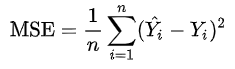

In [48]:
mse=mean_squared_error(target,y_pred)
mse

0.17581754220802784

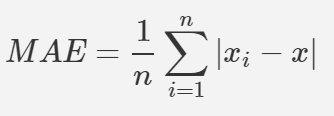

In [49]:
mae=mean_absolute_error(target,y_pred)
mae

0.36474003862364796

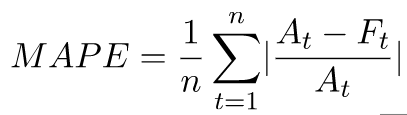

In [50]:
mape=mean_absolute_percentage_error(target,y_pred)
mape

1.0843148337483364